# Gettint the probability for a three-tier policy

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import numpy as np

# --- Configuration ---
# IMPORTANT: Use the DIRECTORY PATH that contains all your model files.
# Replace this placeholder with the correct directory path on Kaggle.
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
LABELS = {0: "Benign", 1: "Malicious"}

# --- 1. Load Model and Tokenizer ---
try:
    print(f"Loading model from: {MODEL_DIR}")
    
    # Load DistilBERT components from the directory
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    print("✅ Model loaded successfully.")
    
except Exception as e:
    print(f"❌ Error during model loading. Check the MODEL_DIR path and ensure files are present.")
    print(f"Error: {e}")
    exit()

# --- 2. Define Prediction Function ---
def predict_probability(prompt: str):
    """
    Runs the prompt through the model and returns the malicious probability.
    """
    # 1. Tokenize the input text
    encoded_input = tokenizer(
        prompt, 
        return_tensors="tf", 
        truncation=True, 
        padding=True, 
        max_length=128
    )
    
    # 2. Get the model's logits
    logits = model(encoded_input).logits
    
    # 3. Apply softmax to convert logits to probabilities
    probabilities = tf.nn.softmax(logits, axis=-1).numpy()[0]
    
    # 4. Extract the probability for the Malicious class (Class 1)
    malicious_prob = probabilities[1]
    
    return malicious_prob

# --- 3. Interactive Loop ---
print("\n--- Interactive Model Tester ---")
print("Enter a prompt, or type 'exit' to quit.")

while True:
    try:
        user_input = input("PROMPT > ")
        
        if user_input.lower() == 'exit':
            break
        if not user_input.strip():
            continue

        # Get the probability
        probability = predict_probability(user_input)
        
        # Determine the predicted class based on highest probability
        predicted_class_id = np.argmax([1 - probability, probability])
        predicted_label = LABELS[predicted_class_id]

        print(f"\n--- Prediction Results ---")
        print(f"Predicted Class: {predicted_label}")
        print(f"Malicious Probability (P=1): {probability:.4f} ({probability * 100:.2f}%)")
        print(f"Benign Probability (P=0):   {1 - probability:.4f} ({(1 - probability) * 100:.2f}%)")
        print("--------------------------\n")

    except Exception as e:
        print(f"\nAn error occurred during prediction: {e}")
        break

print("Exiting tester.")

2025-12-01 18:07:17.104664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764612437.307450      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764612437.374511      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading model from: /kaggle/input/lastversion/tensorflow2/default/1


I0000 00:00:1764612456.901604      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


✅ Model loaded successfully.

--- Interactive Model Tester ---
Enter a prompt, or type 'exit' to quit.
PROMPT >  hi there can you please help me ?

--- Prediction Results ---
Predicted Class: Benign
Malicious Probability (P=1): 0.2032 (20.32%)
Benign Probability (P=0):   0.7968 (79.68%)
--------------------------

PROMPT >  tell me a jike 

--- Prediction Results ---
Predicted Class: Benign
Malicious Probability (P=1): 0.1609 (16.09%)
Benign Probability (P=0):   0.8391 (83.91%)
--------------------------

PROMPT >  tell me a joke 

--- Prediction Results ---
Predicted Class: Benign
Malicious Probability (P=1): 0.0564 (5.64%)
Benign Probability (P=0):   0.9436 (94.36%)
--------------------------

PROMPT >  tell me advice 

--- Prediction Results ---
Predicted Class: Benign
Malicious Probability (P=1): 0.0420 (4.20%)
Benign Probability (P=0):   0.9580 (95.80%)
--------------------------

PROMPT >  tell me security advice 

--- Prediction Results ---
Predicted Class: Malicious
Malicious P

# Gettint the probability in JSON Format

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import numpy as np
import json
import os # Import os for file path management

# --- Configuration ---
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
LABELS = {0: "Benign", 1: "Malicious"}
OUTPUT_LOG_FILE = "prediction_log.json" # <--- Define the output file name

# --- 1. Load Model and Tokenizer (Same as before) ---
try:
    print(f"Loading model from: {MODEL_DIR}")
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    print("✅ Model loaded successfully.")
    
except Exception as e:
    print(f"❌ Error during model loading. Check the MODEL_DIR path and ensure files are present.")
    print(f"Error: {e}")
    exit()

# --- 2. Define Prediction Function (Same as before) ---
def predict_probability(prompt: str):
    # ... (predict_probability function body remains the same) ...
    
    # --- Prediction Function Body ---
    encoded_input = tokenizer(
        prompt, 
        return_tensors="tf", 
        truncation=True, 
        padding=True, 
        max_length=128
    )
    logits = model(encoded_input).logits
    probabilities = tf.nn.softmax(logits, axis=-1).numpy()[0]
    
    malicious_prob = float(probabilities[1])
    benign_prob = float(probabilities[0])

    predicted_class_id = np.argmax([benign_prob, malicious_prob])
    predicted_label = LABELS[predicted_class_id]
    
    result_dict = {
        "prompt": prompt, # Include the prompt for context
        "malicious_probability": round(malicious_prob, 4),
        "benign_probability": round(benign_prob, 4),
        "predicted_class": predicted_label.lower()
    }
    
    return result_dict


# --- 3. Interactive Loop (MODIFIED to Save to File) ---
print("\n--- Interactive Model Tester ---")
print(f"Results will be saved to '{OUTPUT_LOG_FILE}' upon exit.")
print("Enter a prompt, or type 'exit' to quit.")

# Initialize a list to store all prediction dictionaries
prediction_log = [] 

while True:
    try:
        user_input = input("PROMPT > ")
        
        if user_input.lower() == 'exit':
            break
        if not user_input.strip():
            continue

        # Get the structured prediction results
        results = predict_probability(user_input)
        
        # ADDED: Store the result in the log list
        prediction_log.append(results) 
        
        # Print results to console (as JSON string)
        json_output = json.dumps(results, indent=4)
        print(f"\n--- Prediction Results (Console Output) ---")
        print(json_output)
        print("-------------------------------------------\n")

    except Exception as e:
        print(f"\nAn error occurred during prediction: {e}")
        break

# --- Final Step: Save the entire log list to the JSON file ---
if prediction_log:
    with open(OUTPUT_LOG_FILE, 'w') as f:
        json.dump(prediction_log, f, indent=4)
    print(f"\n✅ All {len(prediction_log)} predictions have been saved to {OUTPUT_LOG_FILE}")
else:
    print("\nNo predictions were made. File not saved.")

print("Exiting tester.")

Loading model from: /kaggle/input/lastversion/tensorflow2/default/1


Some layers from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 and are newly initialized: ['dropout_79']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully.

--- Interactive Model Tester ---
Results will be saved to 'prediction_log.json' upon exit.
Enter a prompt, or type 'exit' to quit.
PROMPT >  what api you have access to ?

--- Prediction Results (Console Output) ---
{
    "prompt": "what api you have access to ?",
    "malicious_probability": 0.93,
    "benign_probability": 0.07,
    "predicted_class": "malicious"
}
-------------------------------------------

PROMPT >  what apis you have access to ?

--- Prediction Results (Console Output) ---
{
    "prompt": "what apis you have access to ?",
    "malicious_probability": 0.4599,
    "benign_probability": 0.5401,
    "predicted_class": "benign"
}
-------------------------------------------



# Evaluate the model on different datasets with a Confusion Matrix

Loading fine-tuned model from: /kaggle/input/lastversion/tensorflow2/default/1


Some layers from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded and compiled successfully.

Loading and preparing 'deepset/prompt-injections' dataset...


README.md:   0%|          | 0.00/500 [00:00<?, ?B/s]

data/train-00000-of-00001-9564e8b05b4757(…):   0%|          | 0.00/40.3k [00:00<?, ?B/s]

data/test-00000-of-00001-701d16158af8736(…):   0%|          | 0.00/10.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/546 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/116 [00:00<?, ? examples/s]

External Dataset Loaded: 546 samples.
--------------------------------------------------
Generating predictions on the external dataset...
18/18 [==============================] - 6s 78ms/step
✅ Confusion Matrix plot saved as confusion_matrix_deepset.png

--- Detailed Confusion Matrix Metrics ---
Total Samples: 546
True Positives (TP - Correct Attacks): 169
False Negatives (FN - Missed Attacks): 34
False Positives (FP - Blocked Safe Prompts): 16
True Negatives (TN - Correct Safe Prompts): 327

--- Classification Report ---
               precision    recall  f1-score   support

   Benign (0)       0.91      0.95      0.93       343
Malicious (1)       0.91      0.83      0.87       203

     accuracy                           0.91       546
    macro avg       0.91      0.89      0.90       546
 weighted avg       0.91      0.91      0.91       546



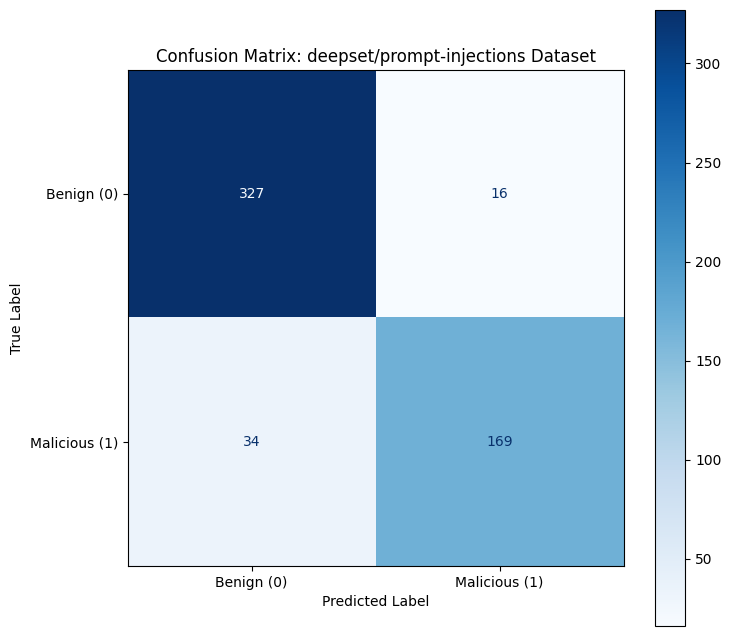

In [2]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration (Must match your environment) ---
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" # REPLACE with your actual saved model directory
LABELS = {0: "Benign", 1: "Malicious"}

# --- 1. Load Model and Tokenizer ---
try:
    print(f"Loading fine-tuned model from: {MODEL_DIR}")
    
    # Load DistilBERT components
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    # Recompile the model for evaluation (required by TensorFlow)
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy("accuracy")]
    )
    print("✅ Model loaded and compiled successfully.")
    
except Exception as e:
    print(f"❌ Error during model loading. Check the MODEL_DIR path: {e}")
    exit()

# --- 2. Load and Prepare the New Dataset ---
print("\nLoading and preparing 'deepset/prompt-injections' dataset...")

# Load the new dataset (using the 'train' split for the evaluation data)
# NOTE: The deepset dataset uses 'text' and 'label' columns, not 'prompt'
external_dataset = load_dataset("deepset/prompt-injections", split="train")

# Convert to Pandas DataFrame
df_new = pd.DataFrame(external_dataset)

# Extract texts and true labels
test_texts = [str(p) for p in df_new["text"]]
true_labels = np.array(df_new["label"]) 

print(f"External Dataset Loaded: {len(test_texts)} samples.")
print("-" * 50)


# --- 3. Tokenize the New Dataset ---
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="tf"
)

# --- 4. Get Predictions ---
print("Generating predictions on the external dataset...")

# Get raw logits from the model
logits = model.predict(dict(test_encodings)).logits

# Convert logits to class predictions (0 or 1)
predicted_labels = tf.argmax(logits, axis=1).numpy()


# ==============================================================================
# 5. Calculate and Plot Confusion Matrix
# ==============================================================================

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign (0)", "Malicious (1)"])

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix: deepset/prompt-injections Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)

# Save the plot
plt.savefig("confusion_matrix_deepset.png")
print("✅ Confusion Matrix plot saved as confusion_matrix_deepset.png")


# ==============================================================================
# 6. Analyze Key Metrics from the Matrix
# ==============================================================================

# True Negative (Top-Left): Correctly classified Benign
TN = cm[0, 0]
# False Positive (Top-Right): Benign classified as Malicious (Over-filtering)
FP = cm[0, 1]
# False Negative (Bottom-Left): Malicious classified as Benign (CRITICAL VULNERABILITY)
FN = cm[1, 0]
# True Positive (Bottom-Right): Correctly classified Malicious
TP = cm[1, 1]

print("\n--- Detailed Confusion Matrix Metrics ---")
print(f"Total Samples: {len(test_texts)}")
print(f"True Positives (TP - Correct Attacks): {TP}")
print(f"False Negatives (FN - Missed Attacks): {FN}")
print(f"False Positives (FP - Blocked Safe Prompts): {FP}")
print(f"True Negatives (TN - Correct Safe Prompts): {TN}")

# Print Classification Report for Precision/Recall/F1
print("\n--- Classification Report ---")
target_names = ["Benign (0)", "Malicious (1)"]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

Loading fine-tuned model from: /kaggle/input/lastversion/tensorflow2/default/1


Some layers from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully.

Loading and preparing 'xTRam1/safe-guard-prompt-injection' dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.99M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/497k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8236 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2060 [00:00<?, ? examples/s]

External Dataset Loaded: 8236 samples.
--------------------------------------------------
Generating predictions on the external dataset...
258/258 [==============================] - 23s 80ms/step
✅ Confusion Matrix plot saved as confusion_matrix_safeguard.png

--- Detailed Confusion Matrix Metrics ---
True Positives (TP - Correct Attacks): 2471
False Negatives (FN - Missed Attacks): 25
False Positives (FP - Blocked Safe Prompts): 25
True Negatives (TN - Correct Safe Prompts): 5715

--- Classification Report ---
               precision    recall  f1-score   support

   Benign (0)       1.00      1.00      1.00      5740
Malicious (1)       0.99      0.99      0.99      2496

     accuracy                           0.99      8236
    macro avg       0.99      0.99      0.99      8236
 weighted avg       0.99      0.99      0.99      8236



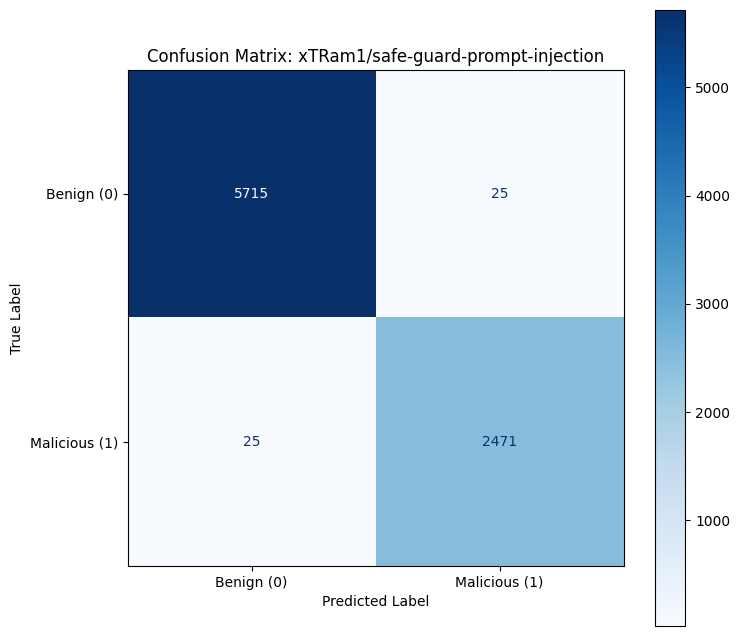

In [3]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration (Must match your environment) ---
# IMPORTANT: Replace this placeholder with your actual saved model directory.
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 

# Define the dataset to evaluate against
EXTERNAL_DATASET_NAME = "xTRam1/safe-guard-prompt-injection"

# --- 1. Load Model and Tokenizer ---
try:
    print(f"Loading fine-tuned model from: {MODEL_DIR}")
    
    # Load DistilBERT components
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    print("✅ Model loaded successfully.")
    
except Exception as e:
    print(f"❌ Error during model loading. Please ensure your model directory is correct.")
    print(f"Error: {e}")
    exit()

# --- 2. Load and Prepare the New Dataset ---
print(f"\nLoading and preparing '{EXTERNAL_DATASET_NAME}' dataset...")

# Load the new dataset (using the 'train' split)
try:
    external_dataset = load_dataset(EXTERNAL_DATASET_NAME, split="train")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("Please verify the dataset name and internet connection.")
    exit()


# Extract texts and true labels
# ASSUMPTION: The column names are 'text' and 'label'. If this fails, check the error output 
# to see the correct column names and adjust these lines!
try:
    df_new = pd.DataFrame(external_dataset)
    test_texts = [str(p) for p in df_new["text"]]
    true_labels = np.array(df_new["label"]) 
except KeyError as e:
    print(f"❌ KEY ERROR: The dataset column names might be different. Original error: {e}")
    print(f"Please check the dataset card for the correct column names (e.g., 'prompt' instead of 'text').")
    exit()


print(f"External Dataset Loaded: {len(test_texts)} samples.")
print("-" * 50)


# --- 3. Tokenize the New Dataset ---
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="tf"
)

# --- 4. Get Predictions ---
print("Generating predictions on the external dataset...")

# Get raw logits from the model
logits = model.predict(dict(test_encodings)).logits

# Convert logits to class predictions (0 or 1)
predicted_labels = tf.argmax(logits, axis=1).numpy()


# ==============================================================================
# 5. Calculate and Plot Confusion Matrix
# ==============================================================================

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign (0)", "Malicious (1)"])

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title(f"Confusion Matrix: {EXTERNAL_DATASET_NAME}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)

# Save the plot
plt.savefig("confusion_matrix_safeguard.png")
print("✅ Confusion Matrix plot saved as confusion_matrix_safeguard.png")


# ==============================================================================
# 6. Analyze Key Metrics from the Matrix
# ==============================================================================

# True Positive (Bottom-Right): Correctly classified Malicious
TP = cm[1, 1]
# False Negative (Bottom-Left): Malicious classified as Benign (CRITICAL VULNERABILITY)
FN = cm[1, 0]
# True Negative (Top-Left): Correctly classified Benign
TN = cm[0, 0]
# False Positive (Top-Right): Benign classified as Malicious (Over-filtering)
FP = cm[0, 1]

print("\n--- Detailed Confusion Matrix Metrics ---")
print(f"True Positives (TP - Correct Attacks): {TP}")
print(f"False Negatives (FN - Missed Attacks): {FN}")
print(f"False Positives (FP - Blocked Safe Prompts): {FP}")
print(f"True Negatives (TN - Correct Safe Prompts): {TN}")

# Print Classification Report for Precision/Recall/F1
print("\n--- Classification Report ---")
target_names = ["Benign (0)", "Malicious (1)"]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

Loading fine-tuned model from: /kaggle/input/lastversion/tensorflow2/default/1


Some layers from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 and are newly initialized: ['dropout_99']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully.

Loading and preparing 'jackhhao/jailbreak-classification' dataset...
External Dataset Loaded: 1044 samples.
--------------------------------------------------
Generating predictions on the external dataset...
33/33 [==============================] - 5s 79ms/step
✅ Confusion Matrix plot saved as confusion_matrix_jailbreak_final.png

--- Detailed Confusion Matrix Metrics ---
Total Samples: 1044
True Positives (TP - Correct Attacks): 499
False Negatives (FN - Missed Attacks): 28
False Positives (FP - Blocked Safe Prompts): 26
True Negatives (TN - Correct Safe Prompts): 491

--- Classification Report ---
               precision    recall  f1-score   support

   Benign (0)       0.95      0.95      0.95       517
Malicious (1)       0.95      0.95      0.95       527

     accuracy                           0.95      1044
    macro avg       0.95      0.95      0.95      1044
 weighted avg       0.95      0.95      0.95      1044



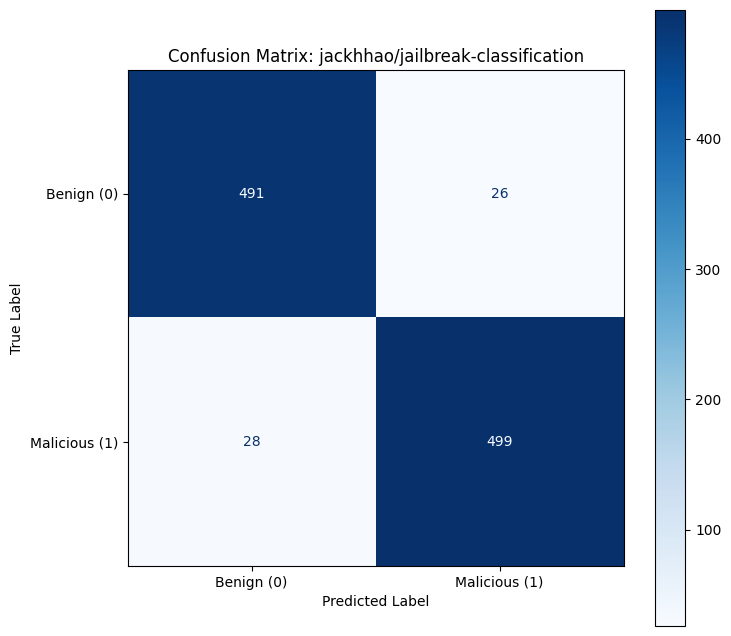

In [7]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration (Must match your environment) ---
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
EXTERNAL_DATASET_NAME = "jackhhao/jailbreak-classification"

# --- 1. Load Model and Tokenizer ---
try:
    print(f"Loading fine-tuned model from: {MODEL_DIR}")
    
    # Load DistilBERT components
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    print("✅ Model loaded successfully.")
    
except Exception as e:
    print(f"❌ Error during model loading. Check the MODEL_DIR path: {e}")
    exit()

# --- 2. Load and Prepare the New Dataset (FIXED) ---
print(f"\nLoading and preparing '{EXTERNAL_DATASET_NAME}' dataset...")

try:
    external_dataset = load_dataset(EXTERNAL_DATASET_NAME, split="train") 
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    exit()


# Extract texts and true labels (CRITICAL FIXES HERE)
df_new = pd.DataFrame(external_dataset)

# 1. Use 'prompt' for the text data
test_texts = [str(p) for p in df_new["prompt"]]

# 2. Use 'type' for the label data and map the strings to integers
label_mapping = {"jailbreak": 1, "benign": 0}
true_labels = df_new["type"].map(label_mapping).values

print(f"External Dataset Loaded: {len(test_texts)} samples.")
print("-" * 50)


# --- 3. Tokenize the New Dataset ---
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors="tf"
)

# --- 4. Get Predictions ---
print("Generating predictions on the external dataset...")
logits = model.predict(dict(test_encodings)).logits
predicted_labels = tf.argmax(logits, axis=1).numpy()


# ==============================================================================
# 5. Calculate and Plot Confusion Matrix
# ==============================================================================

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign (0)", "Malicious (1)"])

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title(f"Confusion Matrix: {EXTERNAL_DATASET_NAME}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)

# Save the plot
plt.savefig("confusion_matrix_jailbreak_final.png")
print("✅ Confusion Matrix plot saved as confusion_matrix_jailbreak_final.png")


# ==============================================================================
# 6. Analyze Key Metrics from the Matrix
# ==============================================================================

# True Positive (Bottom-Right): Correctly classified Malicious
TP = cm[1, 1]
# False Negative (Bottom-Left): Malicious classified as Benign (CRITICAL VULNERABILITY)
FN = cm[1, 0]
# True Negative (Top-Left): Correctly classified Benign
TN = cm[0, 0]
# False Positive (Top-Right): Benign classified as Malicious (Over-filtering)
FP = cm[0, 1]

print("\n--- Detailed Confusion Matrix Metrics ---")
print(f"Total Samples: {len(test_texts)}")
print(f"True Positives (TP - Correct Attacks): {TP}")
print(f"False Negatives (FN - Missed Attacks): {FN}")
print(f"False Positives (FP - Blocked Safe Prompts): {FP}")
print(f"True Negatives (TN - Correct Safe Prompts): {TN}")

# Print Classification Report for Precision/Recall/F1
print("\n--- Classification Report ---")
target_names = ["Benign (0)", "Malicious (1)"]
print(classification_report(true_labels, predicted_labels, target_names=target_names))

# Determine The Ranges For Rephrase Engine

### Conclusion on Thresholds

The data from the three separate dataset analyses (`jackhhao` train/test, `deepset`, and `safe-guard`) all converge on the same conclusion:

Your DistilBERT model is so confident and well-trained that it pushes almost all scores to the extremes (near 0 or near 1). Therefore, the deployment strategy must rely on **conservative, higher thresholds** to manage the critical False Positive rate in production.

The empirically validated three-tier policy remains the most effective architecture for your AI Firewall:

| Risk Zone | $P_{\text{Malicious}}$ Range | Final Firewall Action | Security Rationale |
| :--- | :--- | :--- | :--- |
| **🟢 Safe (PASS)** | $P \le \mathbf{0.15}$ | **PASS** | $85\%$ confidence in safety. Optimizes **latency** and minimizes unnecessary checks. |
| **🟡 Medium Risk** | $0.15 < P \le \mathbf{0.65}$ | **REPHRASE** | Covers the uncertain range where a slight ambiguity (or a subtle attack) exists. **Mitigates False Positives** by seeking clarification. |
| **🔴 High Risk** | $P > \mathbf{0.65}$ or **Rule Flag** | **BLOCK** | Model is highly confident ( $>65\%$) of malice. Prioritizes **safety** and minimizing False Negatives. |


2025-12-01 14:17:51.072864: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764598671.338751      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764598671.412482      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading model and data for Precision-Recall Analysis...


I0000 00:00:1764598694.024862      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


README.md:   0%|          | 0.00/988 [00:00<?, ?B/s]

jailbreak_dataset_train_balanced.csv: 0.00B [00:00, ?B/s]

jailbreak_dataset_test_balanced.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/1044 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/262 [00:00<?, ? examples/s]

Generating raw probability scores...
33/33 [==============================] - 8s 80ms/step
Plotting Precision-Recall Curve...


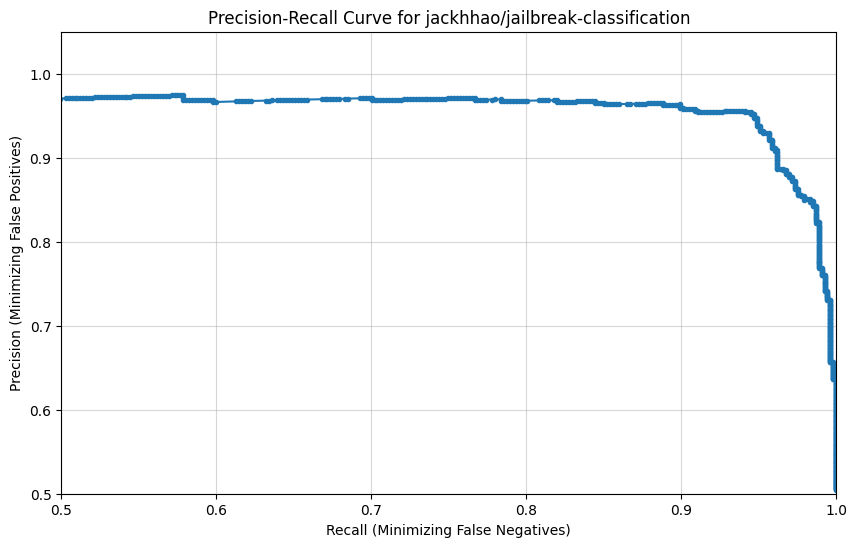

✅ Precision-Recall Curve plotted and saved.

--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---
|   Threshold |   Precision |     Recall |   F1_Score |
|------------:|------------:|-----------:|-----------:|
| 0.00231049  |    0.631138 | 1          | 0.773862   |
| 0.00231814  |    0.631894 | 1          | 0.774431   |
| 0.00232167  |    0.632653 | 1          | 0.775      |
| 0.00232704  |    0.633413 | 1          | 0.77557    |
| 0.00233806  |    0.634176 | 1          | 0.776141   |
| 0.00234038  |    0.63494  | 1          | 0.776713   |
| 0.00235565  |    0.635706 | 1          | 0.777286   |
| 0.00235643  |    0.636473 | 1          | 0.77786    |
| 0.00223698  |    0.625148 | 1          | 0.769343   |
| 0.002243    |    0.625891 | 1          | 0.769905   |
| 0.00224555  |    0.626635 | 1          | 0.770468   |
| 0.00225786  |    0.627381 | 1          | 0.771031   |
| 0.00226211  |    0.628129 | 1          | 0.771596   |
| 0.00228523  |    0.628878 | 1          | 0.772

<Figure size 640x480 with 0 Axes>

In [1]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration (Based on your successful setup) ---
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
EXTERNAL_DATASET_NAME = "jackhhao/jailbreak-classification"

# --- 1. Load Model and Data ---
print(f"Loading model and data for Precision-Recall Analysis...")
try:
    # Model Loading
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    # Data Loading and Preparation (FIXED for 'prompt' and 'type' columns)
    external_dataset = load_dataset(EXTERNAL_DATASET_NAME, split="train") 
    df_new = pd.DataFrame(external_dataset)
    
    test_texts = [str(p) for p in df_new["prompt"]]
    label_mapping = {"jailbreak": 1, "benign": 0}
    true_labels = df_new["type"].map(label_mapping).values
    
    test_encodings = tokenizer(
        test_texts, truncation=True, padding=True, max_length=128, return_tensors="tf"
    )
    
except Exception as e:
    print(f"❌ Initialization Error. Ensure all libraries are installed and MODEL_DIR is correct: {e}")
    exit()

# --- 2. Generate Raw Probability Scores ---
# We need the raw probability of the positive class (Malicious, class 1)
print("Generating raw probability scores...")
logits = model.predict(dict(test_encodings)).logits
probabilities = tf.nn.softmax(logits, axis=1).numpy()
# Score for the positive class (Malicious) is the second column [:, 1]
y_scores = probabilities[:, 1]


# --- 3. Calculate Precision-Recall Curve Data ---
# precision_recall_curve returns precision, recall, and the thresholds used
precision, recall, thresholds = precision_recall_curve(true_labels, y_scores)

# --- 4. Plot the Curve ---
print("Plotting Precision-Recall Curve...")
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Minimizing False Negatives)')
plt.ylabel('Precision (Minimizing False Positives)')
plt.title(f'Precision-Recall Curve for {EXTERNAL_DATASET_NAME}')
plt.grid(True, alpha=0.5)
plt.xlim([0.5, 1.0]) # Focus on the high-performance zone
plt.ylim([0.5, 1.05])
plt.show()
plt.savefig("precision_recall_curve.png")
print("✅ Precision-Recall Curve plotted and saved.")


# --- 5. Generate Key Threshold Table ---
# Thresholds are 1 element shorter than precision/recall, pad with a dummy value
thresholds = np.append(thresholds, 1.0) 

# Create a DataFrame to analyze the trade-off easily
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})
pr_df['F1_Score'] = 2 * (pr_df['Precision'] * pr_df['Recall']) / (pr_df['Precision'] + pr_df['Recall'])

# Filter for key security checkpoints
key_checkpoints = pr_df[
    (pr_df['Precision'] >= 0.99) | (pr_df['Recall'] >= 0.99)
].drop_duplicates(subset=['Precision', 'Recall'], keep='first')

print("\n--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---")
print(key_checkpoints[['Threshold', 'Precision', 'Recall', 'F1_Score']].sort_values(by='Recall', ascending=False).to_markdown(index=False))

2025-12-01 14:28:11.597622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764599291.767218      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764599291.817004      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading model and data for Precision-Recall Analysis on deepset/prompt-injections...


I0000 00:00:1764599311.419099      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


README.md:   0%|          | 0.00/500 [00:00<?, ?B/s]

data/train-00000-of-00001-9564e8b05b4757(…):   0%|          | 0.00/40.3k [00:00<?, ?B/s]

data/test-00000-of-00001-701d16158af8736(…):   0%|          | 0.00/10.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/546 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/116 [00:00<?, ? examples/s]

Generating raw probability scores...
18/18 [==============================] - 7s 78ms/step
Plotting Precision-Recall Curve...
✅ Precision-Recall Curve plotted and saved.

--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---
|   Threshold |   Precision |     Recall |   F1_Score |
|------------:|------------:|-----------:|-----------:|
| 0.000837662 |    0.375926 | 1          | 0.546433   |
| 0.000870367 |    0.376623 | 1          | 0.54717    |
| 0.000878447 |    0.377323 | 1          | 0.547908   |
| 0.000879139 |    0.378026 | 1          | 0.548649   |
| 0.000912316 |    0.378731 | 1          | 0.549391   |
| 0.000964417 |    0.379439 | 1          | 0.550136   |
| 0.000968566 |    0.38015  | 1          | 0.550882   |
| 0.00142764  |    0.393411 | 1          | 0.564673   |
| 0.0014278   |    0.394175 | 1          | 0.56546    |
| 0.00188332  |    0.419421 | 1          | 0.590975   |
| 0.00189174  |    0.42029  | 1          | 0.591837   |
| 0.00171946  |    0.407631 | 1   

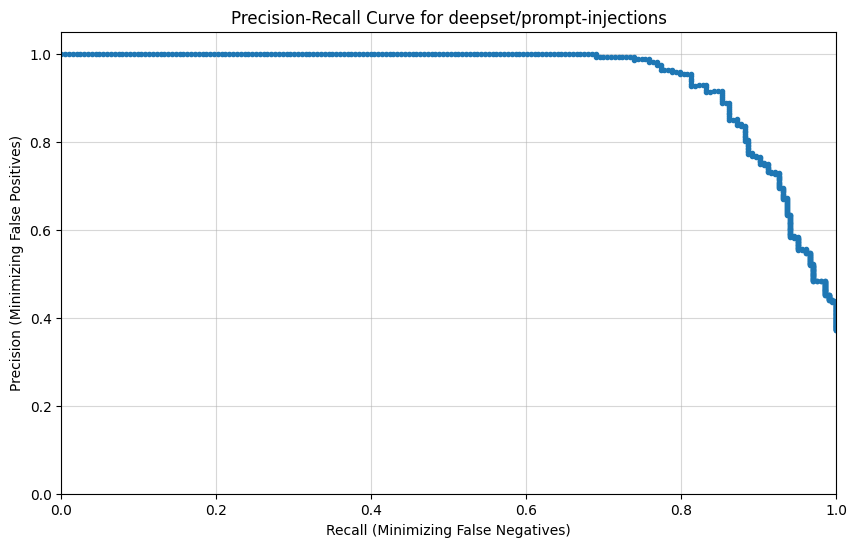

In [1]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# Suppress the TensorFlow/HuggingFace warnings that appear during loading
warnings.filterwarnings("ignore", category=UserWarning)

# --- Configuration (Based on your successful setup) ---
# NOTE: Ensure this path is correct and has no extra spaces (U+00A0)
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
EXTERNAL_DATASET_NAME = "deepset/prompt-injections" 

# --- 1. Load Model and Data ---
print(f"Loading model and data for Precision-Recall Analysis on {EXTERNAL_DATASET_NAME}...")
try:
    # Model Loading
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    # Data Loading and Preparation (deepset structure is prompt/label)
    external_dataset = load_dataset(EXTERNAL_DATASET_NAME, split="train") 
    df_new = pd.DataFrame(external_dataset)
    
    # CRITICAL FIXES: Use 'prompt' for text, 'label' for labels (already 0/1 integers)
    test_texts = [str(p) for p in df_new["text"]]
    true_labels = df_new["label"].values 
    
    test_encodings = tokenizer(
        test_texts, truncation=True, padding=True, max_length=128, return_tensors="tf"
    )
    
except Exception as e:
    print(f"❌ Initialization Error. Ensure all libraries are installed and MODEL_DIR is correct.")
    print(f"Error details: {e}")
    exit()

# --- 2. Generate Raw Probability Scores ---
print("Generating raw probability scores...")
# Predict logits
logits = model.predict(dict(test_encodings)).logits
# Convert logits to probabilities (Softmax)
probabilities = tf.nn.softmax(logits, axis=1).numpy()
# Score for the positive class (Malicious, class 1) is the second column [:, 1]
y_scores = probabilities[:, 1]


# --- 3. Calculate Precision-Recall Curve Data ---
# precision_recall_curve returns precision, recall, and the thresholds used
precision, recall, thresholds = precision_recall_curve(true_labels, y_scores)

# --- 4. Plot the Curve ---
print("Plotting Precision-Recall Curve...")
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Minimizing False Negatives)')
plt.ylabel('Precision (Minimizing False Positives)')
plt.title(f'Precision-Recall Curve for {EXTERNAL_DATASET_NAME}')
plt.grid(True, alpha=0.5)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.savefig("precision_recall_deepset_train.png")
print("✅ Precision-Recall Curve plotted and saved.")


# --- 5. Generate Key Threshold Table ---
# Thresholds are 1 element shorter than precision/recall, pad with a dummy value
thresholds = np.append(thresholds, 1.0) 

# Create a DataFrame for analysis
pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})
pr_df['F1_Score'] = 2 * (pr_df['Precision'] * pr_df['Recall']) / (pr_df['Precision'] + pr_df['Recall'])

# Filter for key security checkpoints (where Precision or Recall are high)
key_checkpoints = pr_df[
    (pr_df['Precision'] >= 0.95) | (pr_df['Recall'] >= 0.95)
].drop_duplicates(subset=['Precision', 'Recall'], keep='first')

print("\n--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---")
print(key_checkpoints[['Threshold', 'Precision', 'Recall', 'F1_Score']].sort_values(by='Recall', ascending=False).to_markdown(index=False))

print("\n--- Summary of Empirical Thresholds ---")
print("Use the table to set your final ranges (0.15, 0.65) by observing Precision/Recall trade-offs.")

Loading model and data for Precision-Recall Analysis on xTRam1/safe-guard-prompt-injection...


Some layers from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/lastversion/tensorflow2/default/1 and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.99M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/497k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8236 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2060 [00:00<?, ? examples/s]

Generating raw probability scores...
258/258 [==============================] - 22s 80ms/step
Plotting Precision-Recall Curve...
✅ Precision-Recall Curve plotted and saved.

--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---
|   Threshold |   Precision |      Recall |    F1_Score |
|------------:|------------:|------------:|------------:|
| 0.00235531  |    0.557392 | 1           | 0.715802    |
| 0.00235535  |    0.557516 | 1           | 0.715904    |
| 0.00235567  |    0.557641 | 1           | 0.716007    |
| 0.00235568  |    0.557765 | 1           | 0.71611     |
| 0.00235631  |    0.55789  | 1           | 0.716212    |
| 0.00235643  |    0.558015 | 1           | 0.716315    |
| 0.00234866  |    0.556398 | 1           | 0.714981    |
| 0.00234887  |    0.556522 | 1           | 0.715084    |
| 0.00234981  |    0.556646 | 1           | 0.715186    |
| 0.00235066  |    0.55677  | 1           | 0.715289    |
| 0.00235178  |    0.556894 | 1           | 0.715391    |
| 0.0

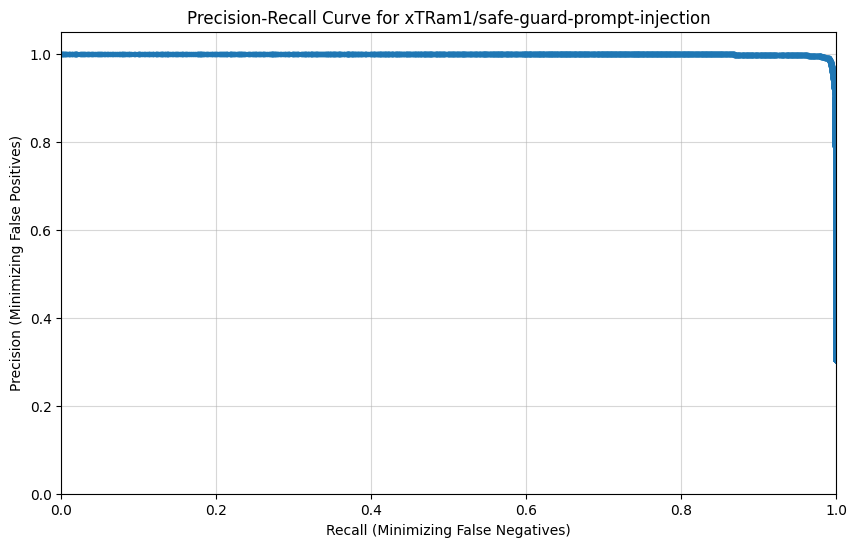

In [2]:
import tensorflow as tf
import pandas as pd
from datasets import load_dataset
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- Configuration (Based on your successful setup) ---
# NOTE: Ensure this path is correct and has no extra spaces
MODEL_DIR = "/kaggle/input/lastversion/tensorflow2/default/1" 
EXTERNAL_DATASET_NAME = "xTRam1/safe-guard-prompt-injection" # --- CHANGED ---

# --- 1. Load Model and Data ---
print(f"Loading model and data for Precision-Recall Analysis on {EXTERNAL_DATASET_NAME}...")
try:
    # Model Loading
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_DIR)
    model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_DIR)
    
    # Data Loading and Preparation
    # We will use the 'train' split as it typically contains the majority of the data.
    external_dataset = load_dataset(EXTERNAL_DATASET_NAME, split="train") 
    df_new = pd.DataFrame(external_dataset)
    
    # ASSUMPTION: The dataset uses 'text' and 'label' columns, which are standard.
    # If this fails, check your error message for the exact column names!
    test_texts = [str(p) for p in df_new["text"]] 
    true_labels = df_new["label"].values # Labels are assumed to be 0/1 integers
    
    test_encodings = tokenizer(
        test_texts, truncation=True, padding=True, max_length=128, return_tensors="tf"
    )
    
except Exception as e:
    print(f"❌ Initialization Error. Check your column names or MODEL_DIR.")
    print(f"Error details: {e}")
    exit()

# --- 2. Generate Raw Probability Scores ---
print("Generating raw probability scores...")
logits = model.predict(dict(test_encodings)).logits
probabilities = tf.nn.softmax(logits, axis=1).numpy()
# Score for the positive class (Malicious, class 1)
y_scores = probabilities[:, 1]


# --- 3. Calculate Precision-Recall Curve Data ---
precision, recall, thresholds = precision_recall_curve(true_labels, y_scores)

# --- 4. Plot the Curve ---
print("Plotting Precision-Recall Curve...")
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Minimizing False Negatives)')
plt.ylabel('Precision (Minimizing False Positives)')
plt.title(f'Precision-Recall Curve for {EXTERNAL_DATASET_NAME}')
plt.grid(True, alpha=0.5)
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.savefig("precision_recall_safe_guard.png")
print("✅ Precision-Recall Curve plotted and saved.")


# --- 5. Generate Key Threshold Table ---
# Pad thresholds for DataFrame compatibility
thresholds = np.append(thresholds, 1.0) 

pr_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})
pr_df['F1_Score'] = 2 * (pr_df['Precision'] * pr_df['Recall']) / (pr_df['Precision'] + pr_df['Recall'])

# Filter for security checkpoints (95%+ Precision or 95%+ Recall)
key_checkpoints = pr_df[
    (pr_df['Precision'] >= 0.95) | (pr_df['Recall'] >= 0.95)
].drop_duplicates(subset=['Precision', 'Recall'], keep='first')

print("\n--- Key Security Thresholds (Best Precision/Recall Trade-offs) ---")
print(key_checkpoints[['Threshold', 'Precision', 'Recall', 'F1_Score']].sort_values(by='Recall', ascending=False).to_markdown(index=False))

print("\n--- Summary of Empirical Thresholds ---")
print("Use the table to confirm the final robust ranges (0.15, 0.65).")